# Question 8 : "THE LEAGUE" (16 points)

### Description

In this football problem, you will work like a data scientist and use real world data to perform a Bayesian Update on the distribution of the Goal Scoring Rate for two teams, Manchester United and Liverpool. 


### Questions 

a. Import the necessary libraries, read the "league_tables.csv" file, and remove rows that are not Liverpool or Manchester United. (2 points)

b. Create two separate dataframes for the two teams and calculate the average goal scoring rate (sum of GF / sum of MP) for each team. (3 points)

c. Fit the gamma distribution for both teams. (2 points)

d. (Given the Poisson likelihood function and update function from the textbook) : Find the updated distribution for Liverpool and Manchester United. For each, also graph the Prior and Posterior distributions in the same plot. On March 5 2023, Liverpool won a match against Manchester United by 7-0.(6 points)

e. Suppose Manchester and Liverpool play each other and the resulting score is 3 (Manchester) - 2 (Liverpool). How certain are we that Manchester is the better team? 


### Part a 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('league_tables.csv')
df2 = df[df['Team'].isin(['Liverpool', 'Manchester Utd'])]
df2.head()

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
9,1993,Liverpool,6,42,16,11,15,62,55,7,59,NaN
11,1993,Manchester Utd,1,42,24,12,6,67,31,36,84,→ Champions League via league finish
30,1994,Liverpool,8,42,17,9,16,59,55,4,60,NaN
32,1994,Manchester Utd,1,42,27,11,4,80,38,42,92,→ Champions League via league finish
54,1995,Liverpool,4,42,21,11,10,65,37,28,74,→ UEFA Cup via league finish


### Part b

In [14]:
liverpool = df2[df2['Team'] == 'Liverpool']
manchester_utd = df2[df2['Team'] == 'Manchester Utd']

scores_liverpool = liverpool['GF'].sum() / liverpool['MP'].sum()
scores_manchester_utd = manchester_utd['GF'].sum() / manchester_utd['MP'].sum()

print(scores_liverpool, scores_manchester_utd)

1.7543402777777777 1.8967013888888888


### Part c

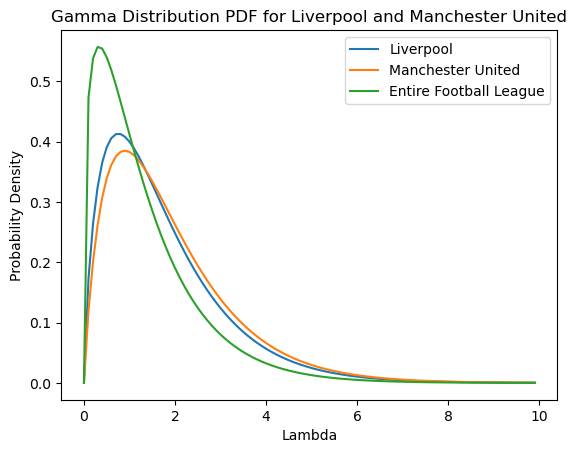

In [27]:
from scipy.stats import gamma, poisson

lambda_range = np.arange(0, 10, .1)

scores_football = df['GF'].sum() / df['MP'].sum()
gamma_football = [gamma.pdf(lam, scores_football) for lam in lambda_range]

gamma_liverpool = [gamma.pdf(lam, scores_liverpool) for lam in lambda_range]
gamma_manchester = [gamma.pdf(lam, scores_manchester_utd) for lam in lambda_range]

plt.plot(lambda_range, gamma_liverpool, label='Liverpool')
plt.plot(lambda_range, gamma_manchester, label='Manchester United')
plt.plot(lambda_range, gamma_football, label='Entire Football League')
plt.xlabel('Lambda')
plt.ylabel('Probability Density')
plt.title('Gamma Distribution PDF for Liverpool and Manchester United')
plt.legend()
plt.show()


### Functions (from textbook)

In [22]:
def likelihood_poisson(lam, data):
    return [poisson.pmf(data, l)  for l in lam]

def update(distribution, likelihood):
    distribution['probs'] = distribution['probs'] * likelihood
    prob_data = distribution['probs'].sum()
    distribution['probs'] = distribution['probs'] / prob_data
    return distribution

### Part d

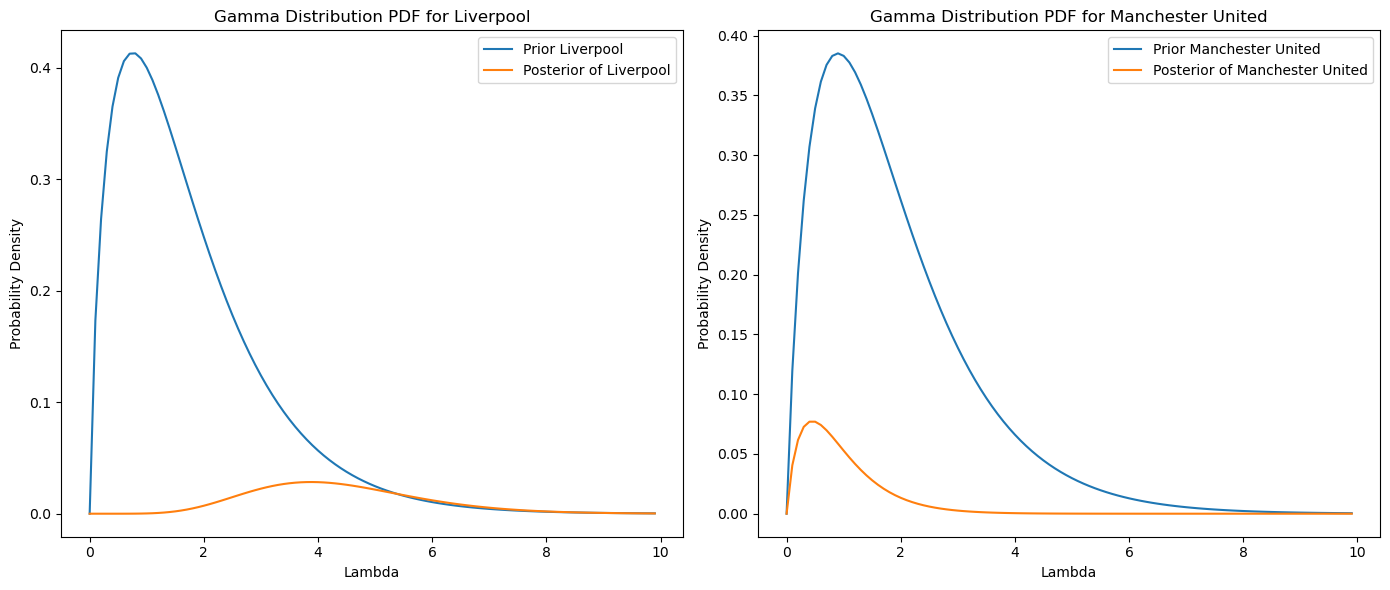

In [51]:
#prior = pd.DataFrame({'lams':lambda_range,'probs':gamma_football/sum(gamma_football)})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

prior_liverpool = pd.DataFrame({'lams':lambda_range,'probs':gamma_liverpool/sum(gamma_liverpool)})
liverpool_prior = prior_liverpool.copy()

prior_manchester = pd.DataFrame({'lams':lambda_range,'probs':gamma_manchester/sum(gamma_manchester)})
manchester_prior = prior_manchester.copy()

update(liverpool_prior, likelihood_poisson(liverpool_prior['lams'], 7));
update(manchester_prior, likelihood_poisson(manchester_prior['lams'], 0));

ax1.plot(lambda_range, gamma_liverpool, label='Prior Liverpool')
ax1.plot(liverpool_prior['lams'], liverpool_prior['probs'], label='Posterior of Liverpool')
ax1.set_xlabel('Lambda')
ax1.set_ylabel('Probability Density')
ax1.set_title('Gamma Distribution PDF for Liverpool')
ax1.legend()

ax2.plot(lambda_range, gamma_manchester, label='Prior Manchester United')
ax2.plot(manchester_prior['lams'], manchester_prior['probs'], label='Posterior of Manchester United')
ax2.set_xlabel('Lambda')
ax2.set_ylabel('Probability Density')
ax2.set_title('Gamma Distribution PDF for Manchester United')
ax2.legend()

plt.tight_layout()
plt.show()

### Part e 

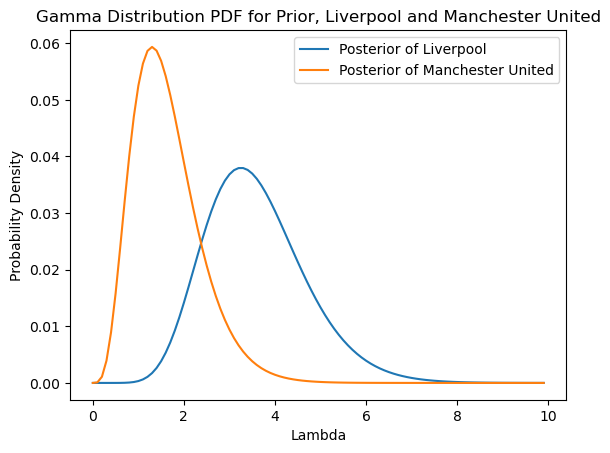

In [52]:
update(liverpool_prior, likelihood_poisson(liverpool_prior['lams'], 2));
update(manchester_prior, likelihood_poisson(manchester_prior['lams'], 3));

plt.plot(liverpool_prior['lams'], liverpool_prior['probs'], label='Posterior of Liverpool')
plt.plot(manchester_prior['lams'], manchester_prior['probs'], label='Posterior of Manchester United')

plt.xlabel('Lambda')
plt.ylabel('Probability Density')
plt.title('Gamma Distribution PDF for Prior, Liverpool and Manchester United')
plt.legend()
plt.show()

In [43]:
def prob_of_s(dist1, dist2):
    """Compute the probability of superiority."""
    total = 0
    for index1, row1 in dist1.iterrows():
        for index2, row2 in dist2.iterrows():
            if row1['lams'] > row2['lams']:
                total += row1['probs'] * row2['probs']
    return total

prob_of_s(liverpool_prior, manchester_prior)

0.866160174949811

In [44]:
def prob_of_s(dist1, dist2):
    """Compute the probability of superiority."""
    total = 0
    for index1, row1 in dist1.iterrows():
        for index2, row2 in dist2.iterrows():
            if row1['lams'] > row2['lams']:
                total += row1['probs'] * row2['probs']
    return total

prob_of_s(manchester_prior, liverpool_prior)

0.11479874760173167